数据分析的流程：
1. 对接需求
2. 获取数据(SQL,爬虫,需求方给数据)
3. 数据分析 - 数据预处理，分析，算法建模
4. 作图
5. 汇报

# 导包

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import datetime
import time 
import seaborn as sns 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = 'SimHei'
import warnings
warnings.filterwarnings('ignore')

# 获取数据

In [5]:
# 读数据
df = pd.read_excel('电商用户数据.xlsx')

# 数据预处理(数据清洗)

## 看字段类型

In [8]:
df.买家昵称.nunique() # unique().size

25949

In [6]:
# 字段类型都没有问题，但是有空值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28833 entries, 0 to 28832
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   买家昵称    28833 non-null  object        
 1   付款日期    28833 non-null  datetime64[ns]
 2   订单状态    28833 non-null  object        
 3   实付金额    28833 non-null  int64         
 4   邮费      28833 non-null  int64         
 5   省份      28833 non-null  object        
 6   城市      28832 non-null  object        
 7   购买数量    28833 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 1.8+ MB


## 重复值

In [12]:
# 只删除了一条完全重复的信息
df = df.drop_duplicates()

## 空值

In [19]:
df.loc[df['城市'].isna()].index

Int64Index([15410], dtype='int64')

In [18]:
# 可以使用新疆的其他城市来进行填充，但是不建议。因为数据量级过少
df.loc[df['省份']=='新疆维吾尔自治区']

,买家昵称,付款日期,订单状态,实付金额,邮费,省份,城市,购买数量
464,之珊珊的幸旅,2019-01-11 01:14:35.000,交易成功,67,0,新疆维吾尔自治区,乌鲁木齐市,1
718,自新疆放己,2019-01-11 01:34:01.000,交易成功,84,0,新疆维吾尔自治区,阿克苏地区,1
788,天花淡,2019-01-11 01:42:37.000,交易成功,80,0,新疆维吾尔自治区,克拉玛依市,3
907,小qqq威,2019-01-11 02:06:10.000,交易成功,84,0,新疆维吾尔自治区,阿勒泰地区,1
1666,9p16,2019-01-11 08:11:08.000,交易成功,74,0,新疆维吾尔自治区,伊犁哈萨克自治州,1
...,...,...,...,...,...,...,...,...
28442,0azezjanyak50,2019-06-27 19:05:40.000,交易成功,31,13,新疆维吾尔自治区,喀什地区,2
28567,雅siri熙,2019-06-28 20:54:49.660,交易成功,72,0,新疆维吾尔自治区,乌鲁木齐市,1
28574,媚x儿,2019-06-28 21:57:59.000,交易成功,168,0,新疆维吾尔自治区,乌鲁木齐市,2
28660,上京润花,2019-06-29 12:29:05.000,交易成功,252,13,新疆维吾尔自治区,阿拉尔市,1


In [24]:
df = df.drop(index=df.loc[df['城市'].isna()].index)

## 异常值

In [ ]:
# 需要极度的理解业务才能去做的处理

In [34]:
df['买家昵称'].nunique()

25948

In [37]:
df['付款日期'].min(),df['付款日期'].max()

(Timestamp('2019-01-01 00:17:59'), Timestamp('2019-06-30 22:46:22.511000'))

In [40]:
df['订单状态'].value_counts()

交易成功                 27791
付款以后用户退款成功，交易自动关闭     1040
Name: 订单状态, dtype: int64

In [43]:
df['省份'].value_counts().size

31

In [26]:
# 数值型字段的基本的数学统计指标
df.describe().T

,count,mean,std,min,25%,50%,75%,max
实付金额,28831.0,126.268912,73.773281,30.0,72.0,115.0,178.0,4225.0
邮费,28831.0,0.245257,1.386481,0.0,0.0,0.0,0.0,18.0
购买数量,28831.0,1.510978,1.483524,1.0,1.0,1.0,2.0,100.0


In [ ]:
300

In [46]:
# 查看99分位数分布
df.describe([0.999]).T

,count,mean,std,min,50%,99.9%,max
实付金额,28831.0,126.268912,73.773281,30.0,115.0,301.34,4225.0
邮费,28831.0,0.245257,1.386481,0.0,0.0,10.00,18.0
购买数量,28831.0,1.510978,1.483524,1.0,1.0,12.00,100.0


找到异常值的方法：
1. 99%的人群是正常的，1%异常的 / 大于300的人  一刀切
2. Q3 - Q1 = IQR    Q1-1.5IQR upper  Q3+1.5IQR top
3. 统计学的角度:一组数据的三倍标准差
4. 业务

异常值处理方式:
1. 删掉
2. 使用填充手段 - 均值，众数，中位数 / 定死一个值 (max/min)

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
实付金额,28831.0,126.268912,73.773281,30.0,72.0,115.0,178.0,4225.0
邮费,28831.0,0.245257,1.386481,0.0,0.0,0.0,0.0,18.0
购买数量,28831.0,1.510978,1.483524,1.0,1.0,1.0,2.0,100.0


In [56]:
len(df['实付金额'].sort_values())*0.75

21623.25

In [57]:
# 针对实付金额进行异常值处理
df['实付金额'].sort_values().reset_index(drop=True)[21623]

178

In [58]:
Q1,Q3 = np.quantile(df['实付金额'],q=[0.25,0.75])

In [59]:
IQR = Q3-Q1

In [60]:
bottom = Q1-1.5*IQR
top = Q3+1.5*IQR

In [62]:
bottom,top

(-87.0, 337.0)

In [70]:
df.loc[df['实付金额'] <= top,'实付金额'].mean()

125.84897080773369

In [71]:
top

337.0

In [72]:
df.loc[df['实付金额'] > top ,'实付金额'] = top

In [73]:
df.describe()

,实付金额,邮费,购买数量
count,28831.000000,28831.000000,28831.000000
mean,126.010093,0.245257,1.510978
std,68.861556,1.386481,1.483524
min,30.000000,0.000000,1.000000
25%,72.000000,0.000000,1.000000
50%,115.000000,0.000000,1.000000
75%,178.000000,0.000000,2.000000
max,337.000000,18.000000,100.000000


# 分析

## 对电商平台用户的消费行为进行统计分析并可视化。

### 查看重复购买用户

<AxesSubplot:>

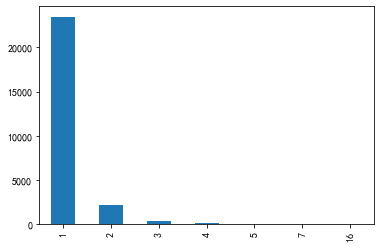

In [79]:
# 每个用户的单量统计
df.groupby('买家昵称')['买家昵称'].count().value_counts().plot(kind='bar')

<AxesSubplot:>

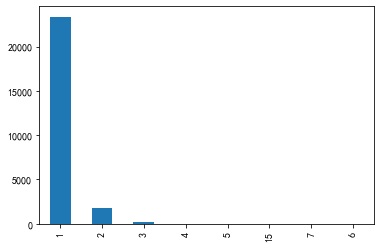

In [83]:
df.loc[(df['订单状态'] == '交易成功')].groupby('买家昵称')['买家昵称'].count().value_counts().plot(kind='bar')

<AxesSubplot:>

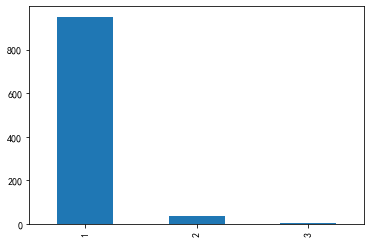

In [82]:
df.loc[~(df['订单状态'] == '交易成功')].groupby('买家昵称')['买家昵称'].count().value_counts().plot(kind='bar')

<AxesSubplot:>

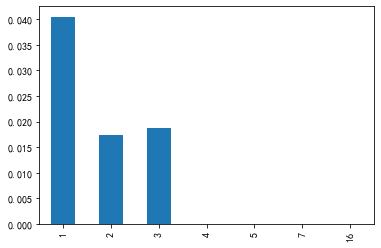

In [86]:
# 在用户的粘性的角度去看，交易一笔订单退单的概率会大，退单概率在4%
(df.loc[~(df['订单状态'] == '交易成功')].groupby('买家昵称')['买家昵称'].count().value_counts()/df.groupby('买家昵称')['买家昵称'].count().value_counts()).plot(kind='bar')

### 交易时间的集中度

In [92]:
data_hour = df['付款日期'].dt.hour.value_counts().sort_index()

<AxesSubplot:>

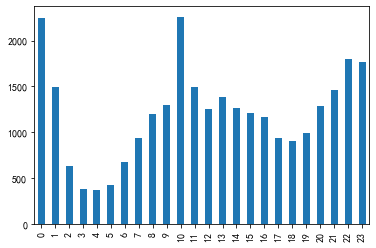

In [96]:
# 用户的交易集中时间在10-11点，以及凌晨0-1点 交易更集中
data_hour.plot(kind='bar')

### 省份

In [104]:
(df.loc[~(df['订单状态'] == '交易成功')]['省份'].value_counts()/df['省份'].value_counts()).sort_values()

吉林省         0.019084
重庆          0.024145
内蒙古自治区      0.026316
江苏省         0.026578
广西壮族自治区     0.027273
上海          0.029098
云南省         0.029586
贵州省         0.030534
北京          0.031746
天津          0.032733
黑龙江省        0.034325
河南省         0.035088
四川省         0.035857
湖南省         0.037037
陕西省         0.038306
辽宁省         0.039125
河北省         0.040000
福建省         0.040089
广东省         0.041046
山东省         0.041825
海南省         0.042017
山西省         0.042169
浙江省         0.043192
新疆维吾尔自治区    0.045455
湖北省         0.049571
江西省         0.052198
安徽省         0.055195
甘肃省         0.068702
青海省         0.080000
宁夏回族自治区     0.106383
西藏自治区       0.333333
Name: 省份, dtype: float64

In [98]:
df['省份'].value_counts()

上海          5808
广东省         3825
北京          2772
江苏省         2408
浙江省         2130
山东省         1052
湖北省         1049
四川省         1004
福建省          898
辽宁省          869
河南省          627
安徽省          616
天津           611
湖南省          594
河北省          575
重庆           497
陕西省          496
黑龙江省         437
江西省          364
云南省          338
山西省          332
广西壮族自治区      330
吉林省          262
贵州省          262
内蒙古自治区       190
新疆维吾尔自治区     154
甘肃省          131
海南省          119
宁夏回族自治区       47
青海省           25
西藏自治区          9
Name: 省份, dtype: int64

通过分析发现，西藏的退单量占比最大，高达33%

### 退款分析

In [110]:
temp = pd.DataFrame(df.groupby(['买家昵称','订单状态'])['实付金额'].sum()).reset_index()

In [115]:
index = temp.loc[temp.loc[:,'订单状态'] != '交易成功'].index

In [120]:
temp['temp'] = temp['订单状态'].apply(lambda x :'' if x == '交易成功' else '-')

In [125]:
temp['res'] = (temp['temp'] + temp['实付金额'].apply(lambda x:str(x))).apply(lambda x: float(x))

In [128]:
temp.loc[temp['res']<0]

,买家昵称,订单状态,实付金额,temp,res
51,0apple3360,付款以后用户退款成功，交易自动关闭,63.0,-,-63.0
72,0bbmanma5,付款以后用户退款成功，交易自动关闭,139.0,-,-139.0
99,0bread200803,付款以后用户退款成功，交易自动关闭,82.0,-,-82.0
103,0bszhouj01,付款以后用户退款成功，交易自动关闭,244.0,-,-244.0
106,0caiwei199107,付款以后用户退款成功，交易自动关闭,526.0,-,-526.0
...,...,...,...,...,...
26305,魔水鱼,付款以后用户退款成功，交易自动关闭,173.0,-,-173.0
26357,麦呢,付款以后用户退款成功，交易自动关闭,114.0,-,-114.0
26379,黎黎蓓黎蓓,付款以后用户退款成功，交易自动关闭,153.0,-,-153.0
26385,黑纯白v暗,付款以后用户退款成功，交易自动关闭,153.0,-,-153.0


In [133]:
user_name = temp.groupby('买家昵称')['res'].sum().loc[temp.groupby('买家昵称')['res'].sum()<0].index

In [134]:
user_name

Index(['0apple3360', '0bbmanma5', '0bread200803', '0bszhouj01',
       '0caiwei199107', '0cicici1603', '0daimimoer7', '0danjie4',
       '0dayoubao28', '0dunkel_27',
       ...
       '阿秀洲出品优瓜', '雪vvi莲', '雪平', '青竹马梅', '静姚', '静安意止', '飞大潼', '麦呢', '黎黎蓓黎蓓',
       '黑纯白v暗'],
      dtype='object', name='买家昵称', length=757)

In [137]:
df.loc[df['买家昵称'].isin(user_name)]

,买家昵称,付款日期,订单状态,实付金额,邮费,省份,城市,购买数量
3,atblovemyy,2019-01-01 09:15:49.000,付款以后用户退款成功，交易自动关闭,84.0,0,江苏省,镇江市,1
4,小星期鱼,2019-01-01 09:59:33.000,付款以后用户退款成功，交易自动关闭,74.0,0,上海,上海市,1
43,clivril_lk,2019-01-02 21:47:44.000,付款以后用户退款成功，交易自动关闭,250.0,0,上海,上海市,1
45,lhappyandbee,2019-01-03 00:20:40.000,付款以后用户退款成功，交易自动关闭,84.0,0,广东省,广州市,1
53,yzhou3,2019-01-03 10:36:12.000,付款以后用户退款成功，交易自动关闭,84.0,0,浙江省,杭州市,1
...,...,...,...,...,...,...,...,...
28759,小聪,2019-06-30 08:25:10.956,付款以后用户退款成功，交易自动关闭,72.0,0,北京,北京市,1
28764,号庞庞,2019-06-30 09:14:03.000,付款以后用户退款成功，交易自动关闭,157.0,8,安徽省,蚌埠市,1
28782,0jessica1128,2019-06-30 13:38:40.000,付款以后用户退款成功，交易自动关闭,43.0,6,浙江省,杭州市,1
28816,8ruoxi7,2019-06-30 20:08:05.000,付款以后用户退款成功，交易自动关闭,49.0,0,湖北省,武汉市,2


# 用户画像-RFM分群

In [ ]:
1   高价值用户 
2   低价值用户 
3   预流失用户
4
5 

RFM评价指标 需要根据每一个维度 找到一个核心的，评价标准来衡量用户的好坏

In [ ]:
2

In [139]:
df.head()

,买家昵称,付款日期,订单状态,实付金额,邮费,省份,城市,购买数量
0,叫我李2,2019-01-01 00:17:59,交易成功,186.0,6,上海,上海市,1
1,0cyb1992,2019-01-01 00:59:54,交易成功,145.0,0,广东省,广州市,1
2,萝污萌莉,2019-01-01 07:48:48,交易成功,194.0,8,山东省,东营市,1
3,atblovemyy,2019-01-01 09:15:49,付款以后用户退款成功，交易自动关闭,84.0,0,江苏省,镇江市,1
4,小星期鱼,2019-01-01 09:59:33,付款以后用户退款成功，交易自动关闭,74.0,0,上海,上海市,1


In [141]:
rfm_order = df.loc[df['订单状态'] == '交易成功']

In [146]:
rfm_user = rfm_order.groupby('买家昵称').agg({'付款日期':np.max,'买家昵称':np.size,'实付金额':np.sum})

In [149]:
last_time = rfm_user['付款日期'].max()

In [153]:
rfm_user['r'] = (last_time - rfm_user['付款日期']).dt.days

In [155]:
rfm_user['f'] = rfm_user['买家昵称']
rfm_user['m'] = rfm_user['实付金额']

<AxesSubplot:>

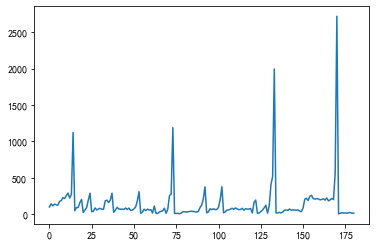

In [160]:
rfm_user['r'].value_counts().sort_index().plot()

In [167]:
pd.cut(rfm_user['r'],bins=[0,120,np.inf]).value_counts().sort_index()

(0.0, 120.0]    13625
(120.0, inf]    11696
Name: r, dtype: int64

In [169]:
rfm_user['R'] = rfm_user['r'].apply(lambda x:'0' if x > 120 else '1')

In [170]:
rfm_user['f'].value_counts()

1     23367
2      1794
3       217
4        33
5         5
15        1
7         1
6         1
Name: f, dtype: int64

In [171]:
rfm_user['F'] = rfm_user['f'].apply(lambda x:'1' if x >= 2 else '0')

In [174]:
pd.cut(rfm_user['m'],bins=[0,100,200,300,np.inf]).value_counts().sort_index()

(0.0, 100.0]      11068
(100.0, 200.0]     8708
(200.0, 300.0]     4889
(300.0, inf]        754
Name: m, dtype: int64

In [176]:
rfm_user['M'] = rfm_user['m'].apply(lambda x:'1' if x >= 124 else '0')

In [179]:
rfm_user['rfm'] = rfm_user['R'] + rfm_user['F'] + rfm_user['M']

In [180]:
rfm_user['rfm'].value_counts()

000    6481
101    6338
100    5934
001    4614
111    1242
011     526
110     209
010      75
Name: rfm, dtype: int64

In [ ]:
75  -  5
30

In [181]:
30/75

0.4

# 策略-优惠券推送

## 评分模型

In [ ]:
5  10   15   3大类优惠券 供所有用户使用 

5    10000
10   8000
15   7000

In [ ]:
25000个用户    Richa   10  15  5 

In [183]:
rfm_user['rfm'].value_counts()

000    6481
101    6338
100    5934
001    4614
111    1242
011     526
110     209
010      75
Name: rfm, dtype: int64

rfm可以用来做策略，可以用来做用户的群体划分。
但是比较局限。
评分模型：针对于用户的每一个维度进行打分,与rfm不同的是评分模型能考量的维度更多了，那么也一定会更精准一些
风险：会让数据更离散化

r f m 购买数量 退单次数

In [187]:
df.loc[df['订单状态']!='交易成功','购买数量'] = 0

In [ ]:
1     1
1     0
1     1

3   2

In [190]:
df['是否退单'] = df['订单状态'].apply(lambda x: 0 if x == '交易成功' else  1)

In [195]:
df.loc[df['订单状态']!='交易成功','实付金额'] = 0

In [197]:
score = df.groupby('买家昵称').agg({'付款日期':np.max,'买家昵称':np.size,'实付金额':np.sum,'是否退单':np.sum,'购买数量':np.sum})

In [199]:
last_time

Timestamp('2019-06-30 22:46:22.511000')

In [203]:
score['r'] = (last_time - score['付款日期']).dt.days

In [205]:
score['购买频次'] = score['买家昵称']

In [207]:
score['m'] = score['实付金额']

In [210]:
td = score['是否退单'].apply(lambda x:0 if x>0 else 1)

In [213]:
gmsl = score['购买数量'].apply(lambda x:1 if x>=2 else 0)

In [215]:
r = score['r'].apply(lambda x:0 if x>=120 else 1)
f = score['购买频次'].apply(lambda x:1 if x>=2 else 0)
m = score['m'].apply(lambda x:1 if x>=124 else 0)

In [ ]:
5    10000
10   8000
15   5000

In [217]:
score['all'] = td + gmsl+r+f+m

In [220]:
score['all'].value_counts().sort_index()

0     234
1    4740
2    9041
3    8944
4    1798
5    1191
Name: all, dtype: int64